In [2]:
pip install vizro

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from vizro import Vizro
import vizro.models as vm
import vizro.plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from vizro import Vizro
import vizro.models as vm

In [4]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

# New Section

In [7]:
student = pd.read_csv("C://Users//HP 430 G3//Downloads//student-mat.csv")
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**1. Exploratory Data Analysis**

In [8]:
#number of students
print('Total number of students:',len(student))

Total number of students: 395


*Summary of Final Grade*

In [9]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

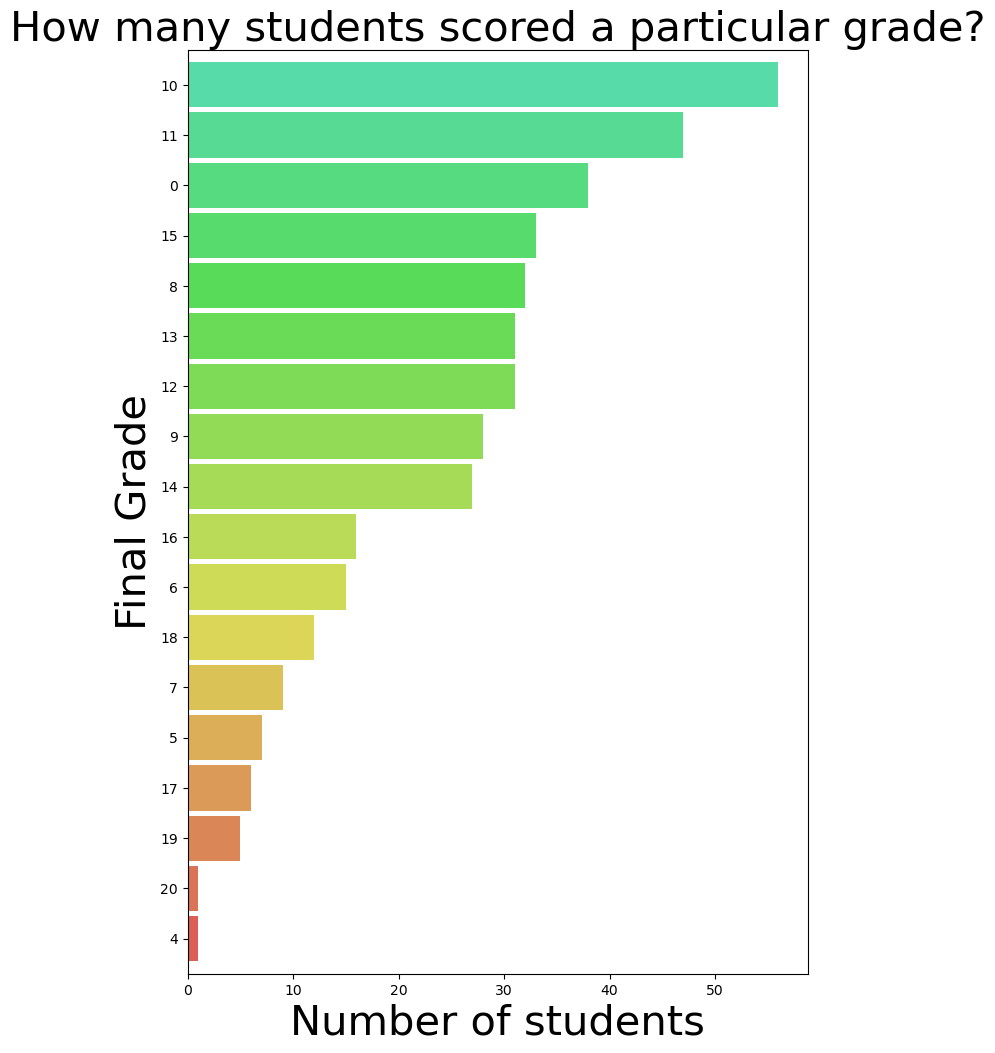

In [10]:
plt.subplots(figsize=(8,12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('hls',40))
grade_counts.axes.set_title('How many students scored a particular grade?',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

From the plot above the students appear to be average peformers since the modal grade is 10 which is between 0 the minimum and 20 the maximum. The finding is consisntent with the average grade which is found to be 10. The comprehensive visualization of teh grade distribution will  be achieved using a histogram.

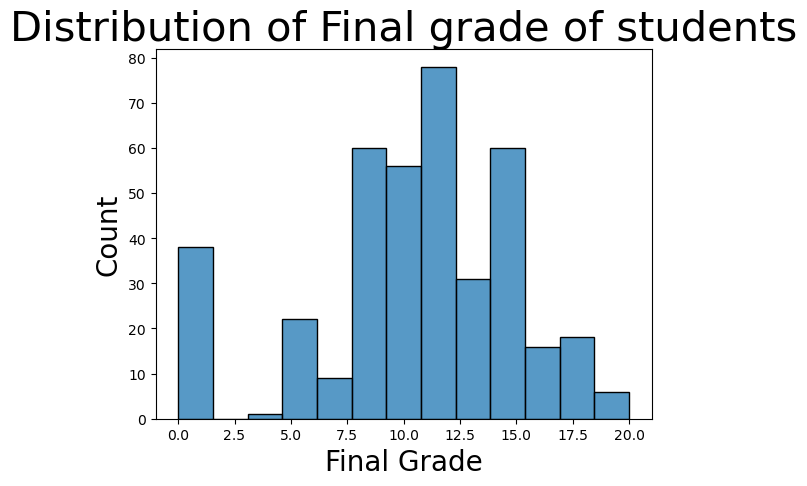

In [11]:
b = sns.histplot(student['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [12]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [13]:
import vizro.plotly.express as px
from vizro import Vizro
import vizro.models as vm

df = px.data.iris()

page = vm.Page(
    title="My first dashboard",
    components=[
        vm.Graph(id="scatter_chart", figure=px.scatter(df, x="sepal_length", y="petal_width", color="species")),
        vm.Graph(id="hist_chart", figure=px.histogram(df, x="sepal_width", color="species")),
    ],
    controls=[
        vm.Filter(column="species", selector=vm.Dropdown(value=["ALL"])),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()


C:\Users\HP 430 G3\AppData\Roaming\Python\Python311\site-packages\vizro\models\_base.py:36: RuntimeWarning:

ModelManager.__setitem__ modifies global state. Doing this after the dashboard has been built will not work reliably if you run the dashboard with multiple processes.



In [17]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


C:\Users\HP 430 G3\AppData\Local\Temp\ipykernel_3956\1553709617.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




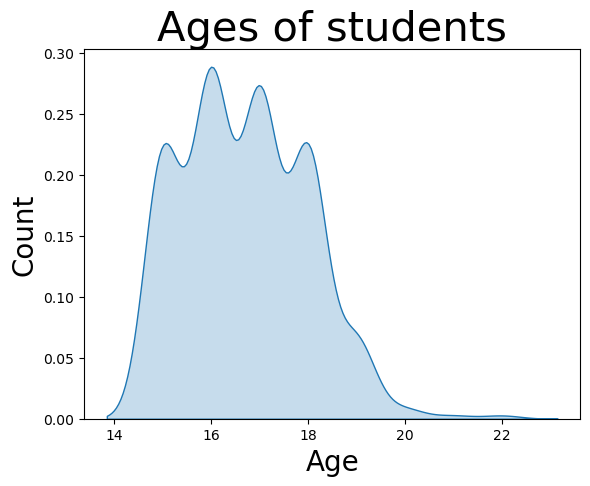

In [18]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

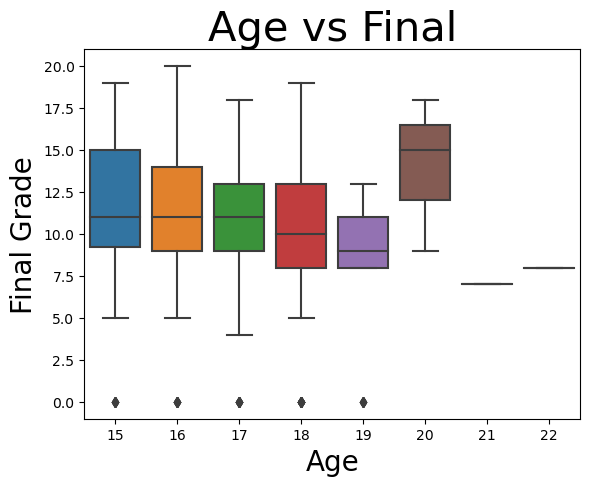

In [21]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



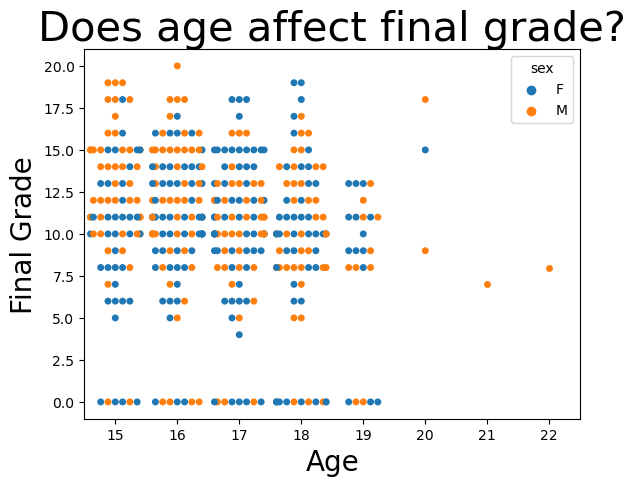

In [22]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [23]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='address', title='Urban and Rural Students')

# Customize the layout
fig.update_layout(
    xaxis_title='Address',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()


C:\Users\HP 430 G3\AppData\Roaming\Python\Python311\site-packages\vizro\models\_base.py:36: RuntimeWarning:

ModelManager.__setitem__ modifies global state. Doing this after the dashboard has been built will not work reliably if you run the dashboard with multiple processes.



In [25]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='school', title='School')

# Customize the layout
fig.update_layout(
    xaxis_title='School',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [26]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='sex', title='Gender')

# Customize the layout
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [27]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='age', title='Age of Students')

# Customize the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [28]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='famsize', title='Family Size')

# Customize the layout
fig.update_layout(
    xaxis_title='Family Size',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [29]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Pstatus', title='Pstatus')

# Customize the layout
fig.update_layout(
    xaxis_title='Pstatus',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [30]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Medu', title='Maternal Education Status')

# Customize the layout
fig.update_layout(
    xaxis_title='Maternal Education Status',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [33]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Fedu', title='Fedu')

# Customize the layout
fig.update_layout(
    xaxis_title='Fedu',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [35]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Mjob', title='job of mother')

# Customize the layout
fig.update_layout(
    xaxis_title='Job of mother',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [36]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Fjob', title='Job of Father')

# Customize the layout
fig.update_layout(
    xaxis_title='Job of Father',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [38]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='reason', title='reason for performance')

# Customize the layout
fig.update_layout(
    xaxis_title='reason',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [39]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='guardian', title='presence of a guardian')

# Customize the layout
fig.update_layout(
    xaxis_title='guardian',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [40]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='internet', title='Internet connectivity')

# Customize the layout
fig.update_layout(
    xaxis_title='internet',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [41]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='traveltime', title='Time spent commuting to school')

# Customize the layout
fig.update_layout(
    xaxis_title='Travel Time',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [42]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='studytime', title='Time spent studying')

# Customize the layout
fig.update_layout(
    xaxis_title='studytime',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [43]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='failures', title='failures')

# Customize the layout
fig.update_layout(
    xaxis_title='failures',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [44]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='schoolsup', title='support from school')

# Customize the layout
fig.update_layout(
    xaxis_title='School Support',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [45]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='famsup', title='family support')

# Customize the layout
fig.update_layout(
    xaxis_title='Family Support',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot
fig.show()

In [49]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='absences', title='Number of absences')

# Customize the layout
fig.update_layout(
    xaxis_title='Absences',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [48]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='G1', title='First Grade')

# Customize the layout
fig.update_layout(
    xaxis_title='First Grade',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [47]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='G2', title='Second Grade')

# Customize the layout
fig.update_layout(
    xaxis_title='Second Grade',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [46]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='G3', title='Grade')

# Customize the layout
fig.update_layout(
    xaxis_title='Grade',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [51]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Dalc', title='Daily alcohol consumption')

# Customize the layout
fig.update_layout(
    xaxis_title='Dalc',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [52]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Walc', title='Weekly alcohol consumption')

# Customize the layout
fig.update_layout(
    xaxis_title='Walc',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [53]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='activities', title='Activities participation')

# Customize the layout
fig.update_layout(
    xaxis_title='activities',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [ ]:
import plotly.express as px

# Assuming 'student' is your DataFrame and 'address' is a column in it
# Make sure you've imported and loaded the data correctly before using it

# Create a countplot using Plotly Express
fig = px.histogram(student, x='Walc', title='Weekly alcohol consumption')

# Customize the layout
fig.update_layout(
    xaxis_title='Walc',
    yaxis_title='Count',
    font=dict(size=20)  # Adjust font size for title and labels
)

# Show the plot

In [55]:
import plotly.express as px
import pandas as pd
import numpy as np


# Create the scatter plot with different colors for each gender
fig = px.scatter(
    student, x='absences', y='G3', color='sex',
    title='Scatter Plot of absences and Score by Gender'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Absences',
    yaxis_title='Grade',
    showlegend=True,
    legend_title='Gender'
)

# Show the plot
fig.show()


In [58]:
import plotly.express as px
import pandas as pd
import numpy as np


# Create the scatter plot with different colors for each gender
fig = px.scatter(
    student, x='age', y='G3', color='sex',
    title='Scatter Plot of Age and Score by Gender'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='age',
    yaxis_title='Grade',
    showlegend=True,
    legend_title='Gender'
)

# Show the plot
fig.show()

In [57]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='sex', y='G3',
    title='Box Plot of Grade by Gender'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Grade',
)

# Show the plot
fig.show()


In [59]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='address', y='G3',
    title='Box Plot of Grade by address'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Address',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [60]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='famsize', y='G3',
    title='Box Plot of Grade by Family Size'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Family Size',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [61]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='Medu', y='G3',
    title='Box Plot of Grade by Maternal Education Status'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Maternal Education Status',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [62]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='Fedu', y='G3',
    title='Box Plot of Grade by Paternal Education Status'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Paternal Education Status',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [63]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='studytime', y='G3',
    title='Box Plot of Grade by Study time'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='study time',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [64]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='traveltime', y='G3',
    title='Box Plot of Grade by travel time'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Travel time',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create a box plot
fig = px.box(
    df, x='address', y='G3',
    title='Box Plot of Grade by address'
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Address',
    yaxis_title='Grade',
)

# Show the plot
fig.show()

C:\Users\HP 430 G3\AppData\Local\Temp\ipykernel_3956\393752969.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\HP 430 G3\AppData\Local\Temp\ipykernel_3956\393752969.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




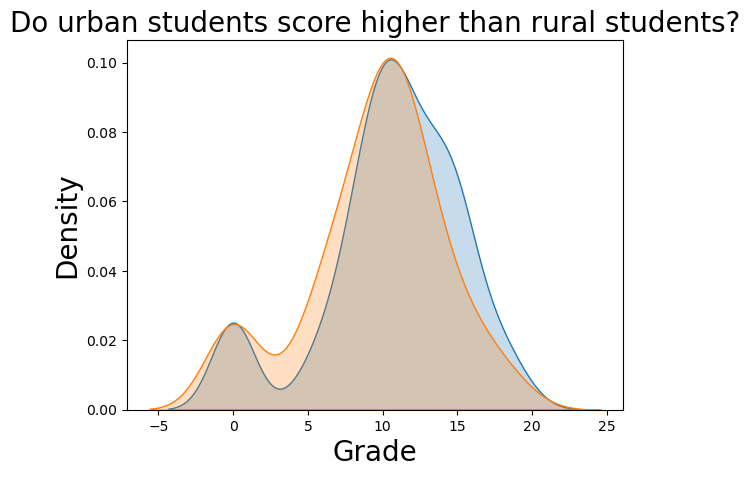

In [65]:
# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



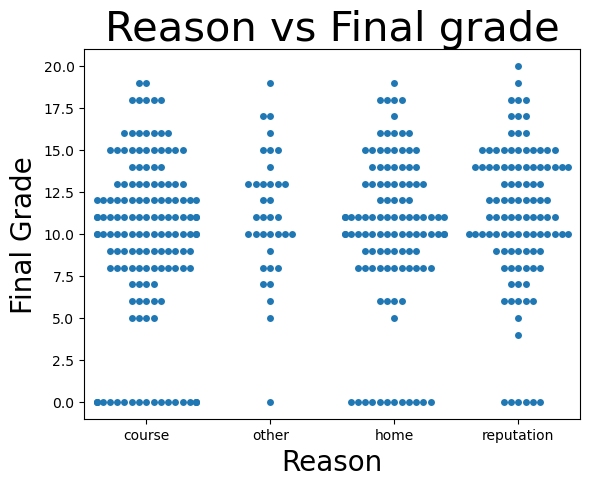

In [66]:
b = sns.swarmplot(x='reason', y='G3', data=student)
b.axes.set_title('Reason vs Final grade', fontsize = 30)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [67]:
student.corr()['G3'].sort_values()

C:\Users\HP 430 G3\AppData\Local\Temp\ipykernel_3956\744916194.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

Encoding

In [68]:
# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
dummy_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0
391,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
392,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0
393,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [69]:
# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [70]:
# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [71]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,10


In [72]:
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [73]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [74]:
student = student.loc[:, most_correlated.index]
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



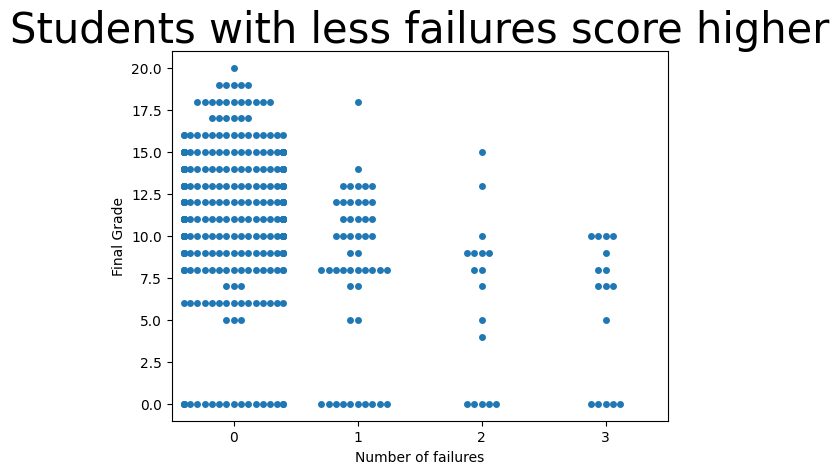

In [ ]:
b = sns.swarmplot(x=student['failures'],y=student['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

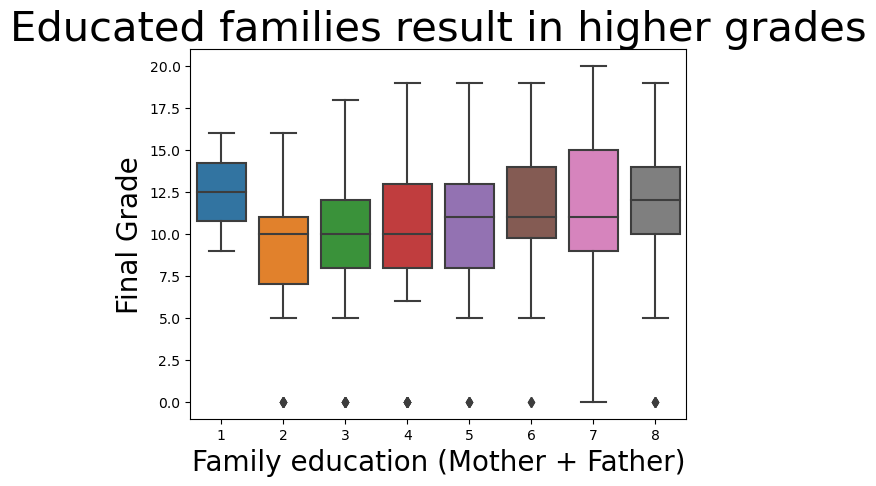

In [75]:
family_ed = student['Fedu'] + student['Medu']
b = sns.boxplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



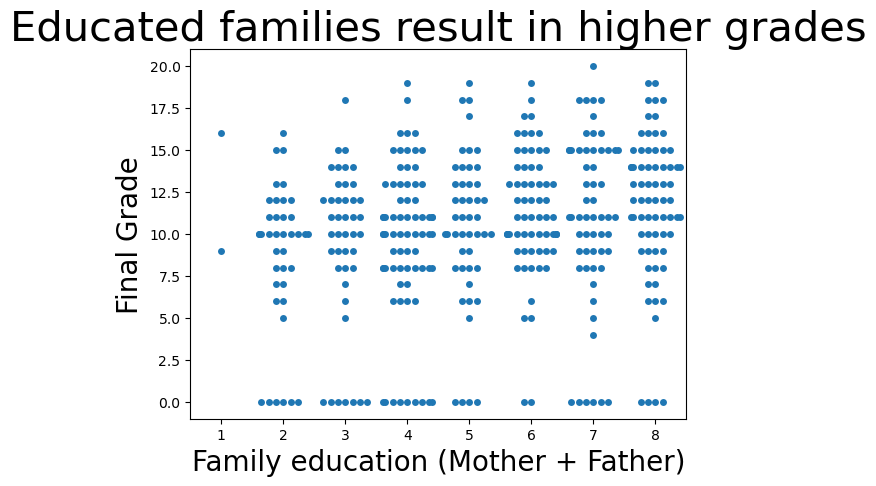

In [76]:
b = sns.swarmplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

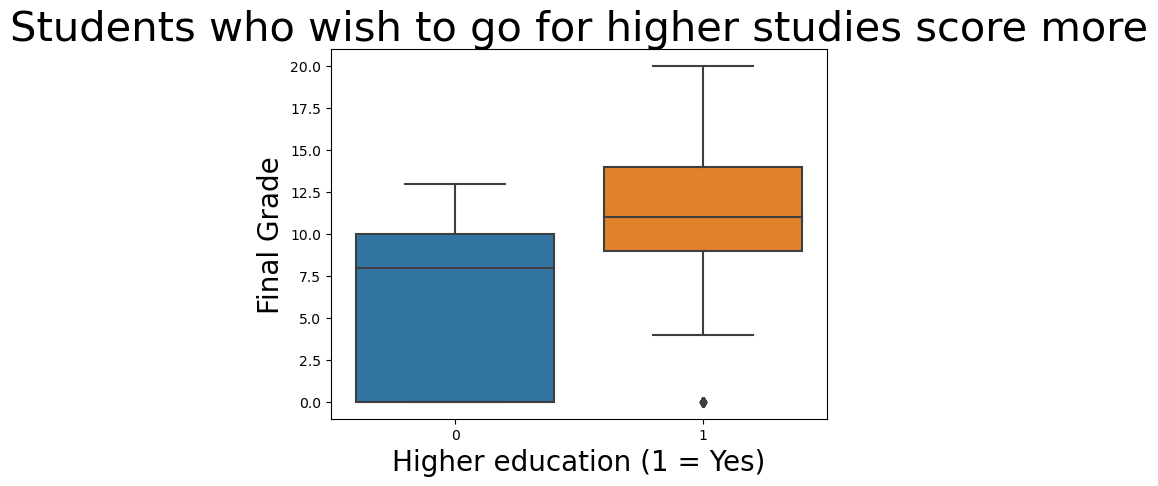

In [77]:
b = sns.boxplot(x = student['higher_yes'], y=student['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

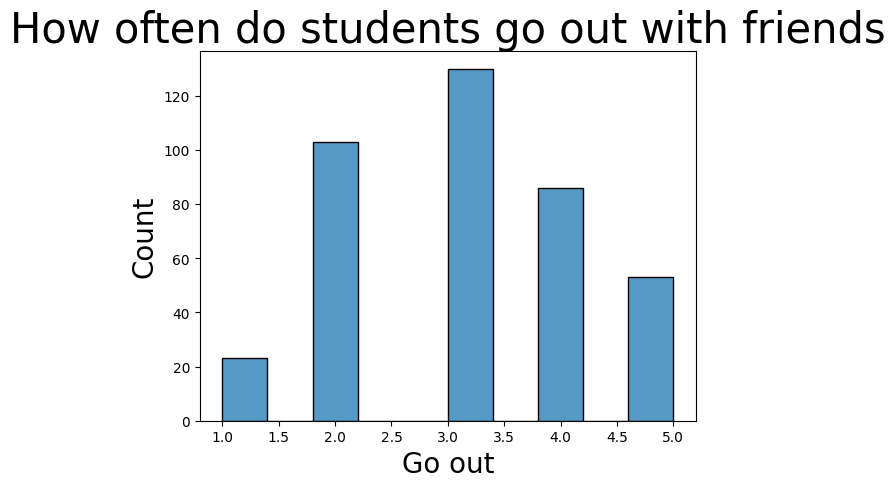

In [ ]:
b = sns.histplot(student['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

# Modeling

### We can create a model in 3 ways

1. Binary classification
    - G3 > 10: pass
    - G3 < 10: fail
2. 5-level classification based on Erasmus grade conversion system
    - 16-20: very good
    - 14-15: good
    - 12-13: satisfactory
    - 10-11: sufficient
    -  0-9 : fail
3. Regression (Predicting G3)

### We will be using the 3rd type

In [78]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(student, labels, test_size = 0.25, random_state=42)

In [79]:
X_train.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
16,14,0,4,1,0,16,4,3,1
66,12,0,4,1,0,15,4,3,0
211,13,0,4,1,0,17,4,5,0
7,6,0,4,1,0,17,4,4,1
19,10,0,4,1,0,16,3,3,1


### MAE - Mean Absolute Error
### RMSE - Root Mean Square Error

In [80]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

### Naive baseline is the median prediction

In [81]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [82]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [83]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [84]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.51289,4.451043
ElasticNet Regression,3.610609,4.576473
Random Forest,3.803113,4.863263
Extra Trees,3.885401,5.041666
SVM,3.592078,4.604506
Gradient Boosted,3.604623,4.486631
Baseline,3.787879,4.825228


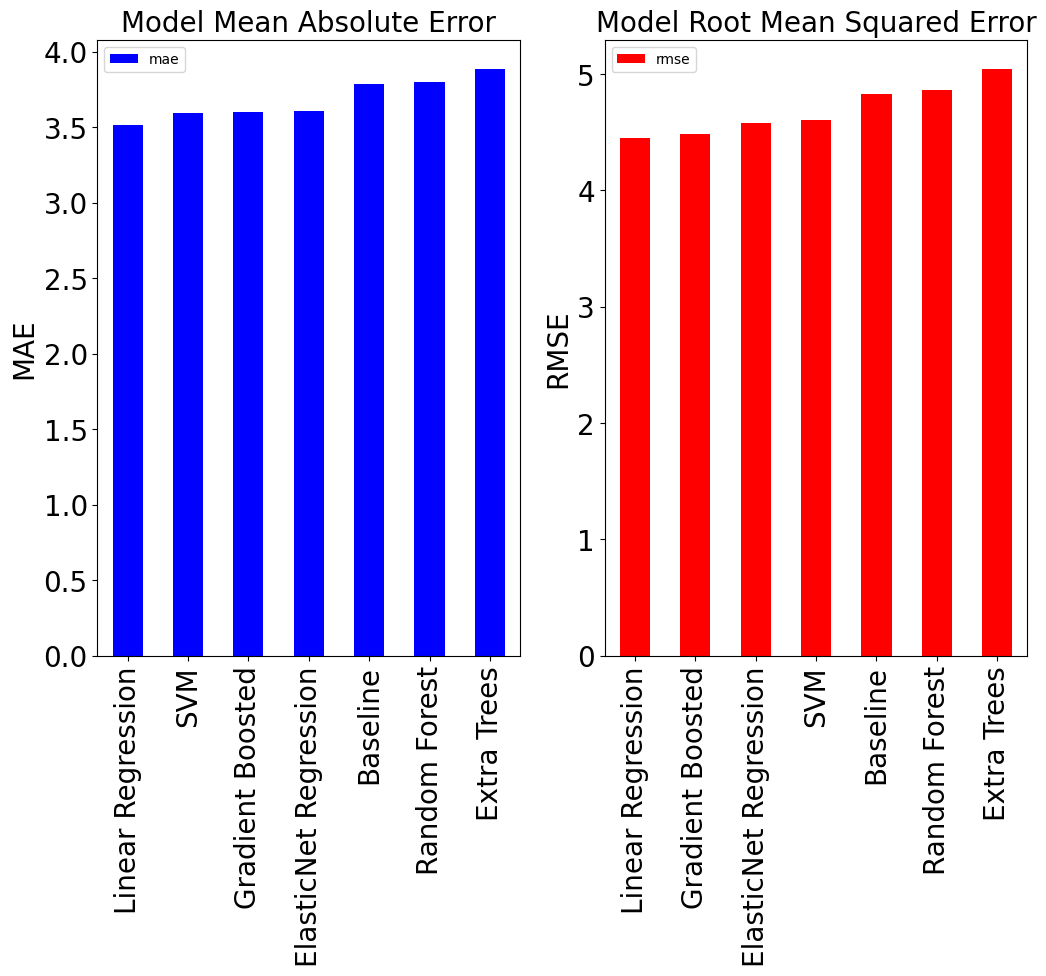

In [85]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()